# Sensitivity test

In [1]:
notebook_name = "sensitivity_test"

In [2]:
from sensitivity_test import *

## あらかじめ絞れるパラメータ

### temperature of sea surface of initial evaporation

Nakamura et al. 2008 GRL　Fig. 1より、typicalな　SST frontは5-15度くらい。その周辺でstorm track活動が活発になると考える。 -> 蒸発起源SST

In [3]:
param_fix_dict = {
    "temp_sea_init_list": [5, 10, 15]    ,
    "BOOL_REEVAP": False, # 十分湿っている雲には返らない
    "temp_surf": [0],
    # "BOOL_RESUB": False,
}

## Tuningにより感度が低いと判断されたパラメータ

In [4]:
param_fix_dict["h_air"] = 1
param_fix_dict["temp_air_init_list"] =  [5, 10, 15]
param_fix_dict["surface_wind"] = 6.5
param_fix_dict["ALPHA_MODE"] = "eff"
param_fix_dict["rh_surf"] = 0.75

## 感度実験の必要なパラメータ

- `temp_air_fin`
- `drh`
- `resub_factor`

0.2456290050936269 0.034863553084234875 -522.3929434615912 -497.5011889139425
0.2456290050936269 0.034863553084234875 -550.1683924634834 -525.2766379158347
0.2456290050936269 0.034863553084234875 -576.2075831856239 -551.3158286379751
0.2456290050936269 0.06275439555162278 -522.3929434615912 -477.5877852758234
0.2456290050936269 0.06275439555162278 -550.1683924634834 -505.36323427771555
0.2456290050936269 0.06275439555162278 -576.2075831856239 -531.4024249998561
0.2456290050936269 0.31377197775811394 -522.3929434615912 -298.3671525327519
0.2456290050936269 0.31377197775811394 -550.1683924634834 -326.14260153464414
0.2456290050936269 0.31377197775811394 -576.2075831856239 -352.1817922567846
0.2456290050936269 0.034863553084234875 -522.3929434615912 -497.5011889139425
0.2456290050936269 0.034863553084234875 -550.1683924634834 -525.2766379158347
0.2456290050936269 0.034863553084234875 -576.2075831856239 -551.3158286379751
0.2456290050936269 0.06275439555162278 -522.3929434615912 -477.58778

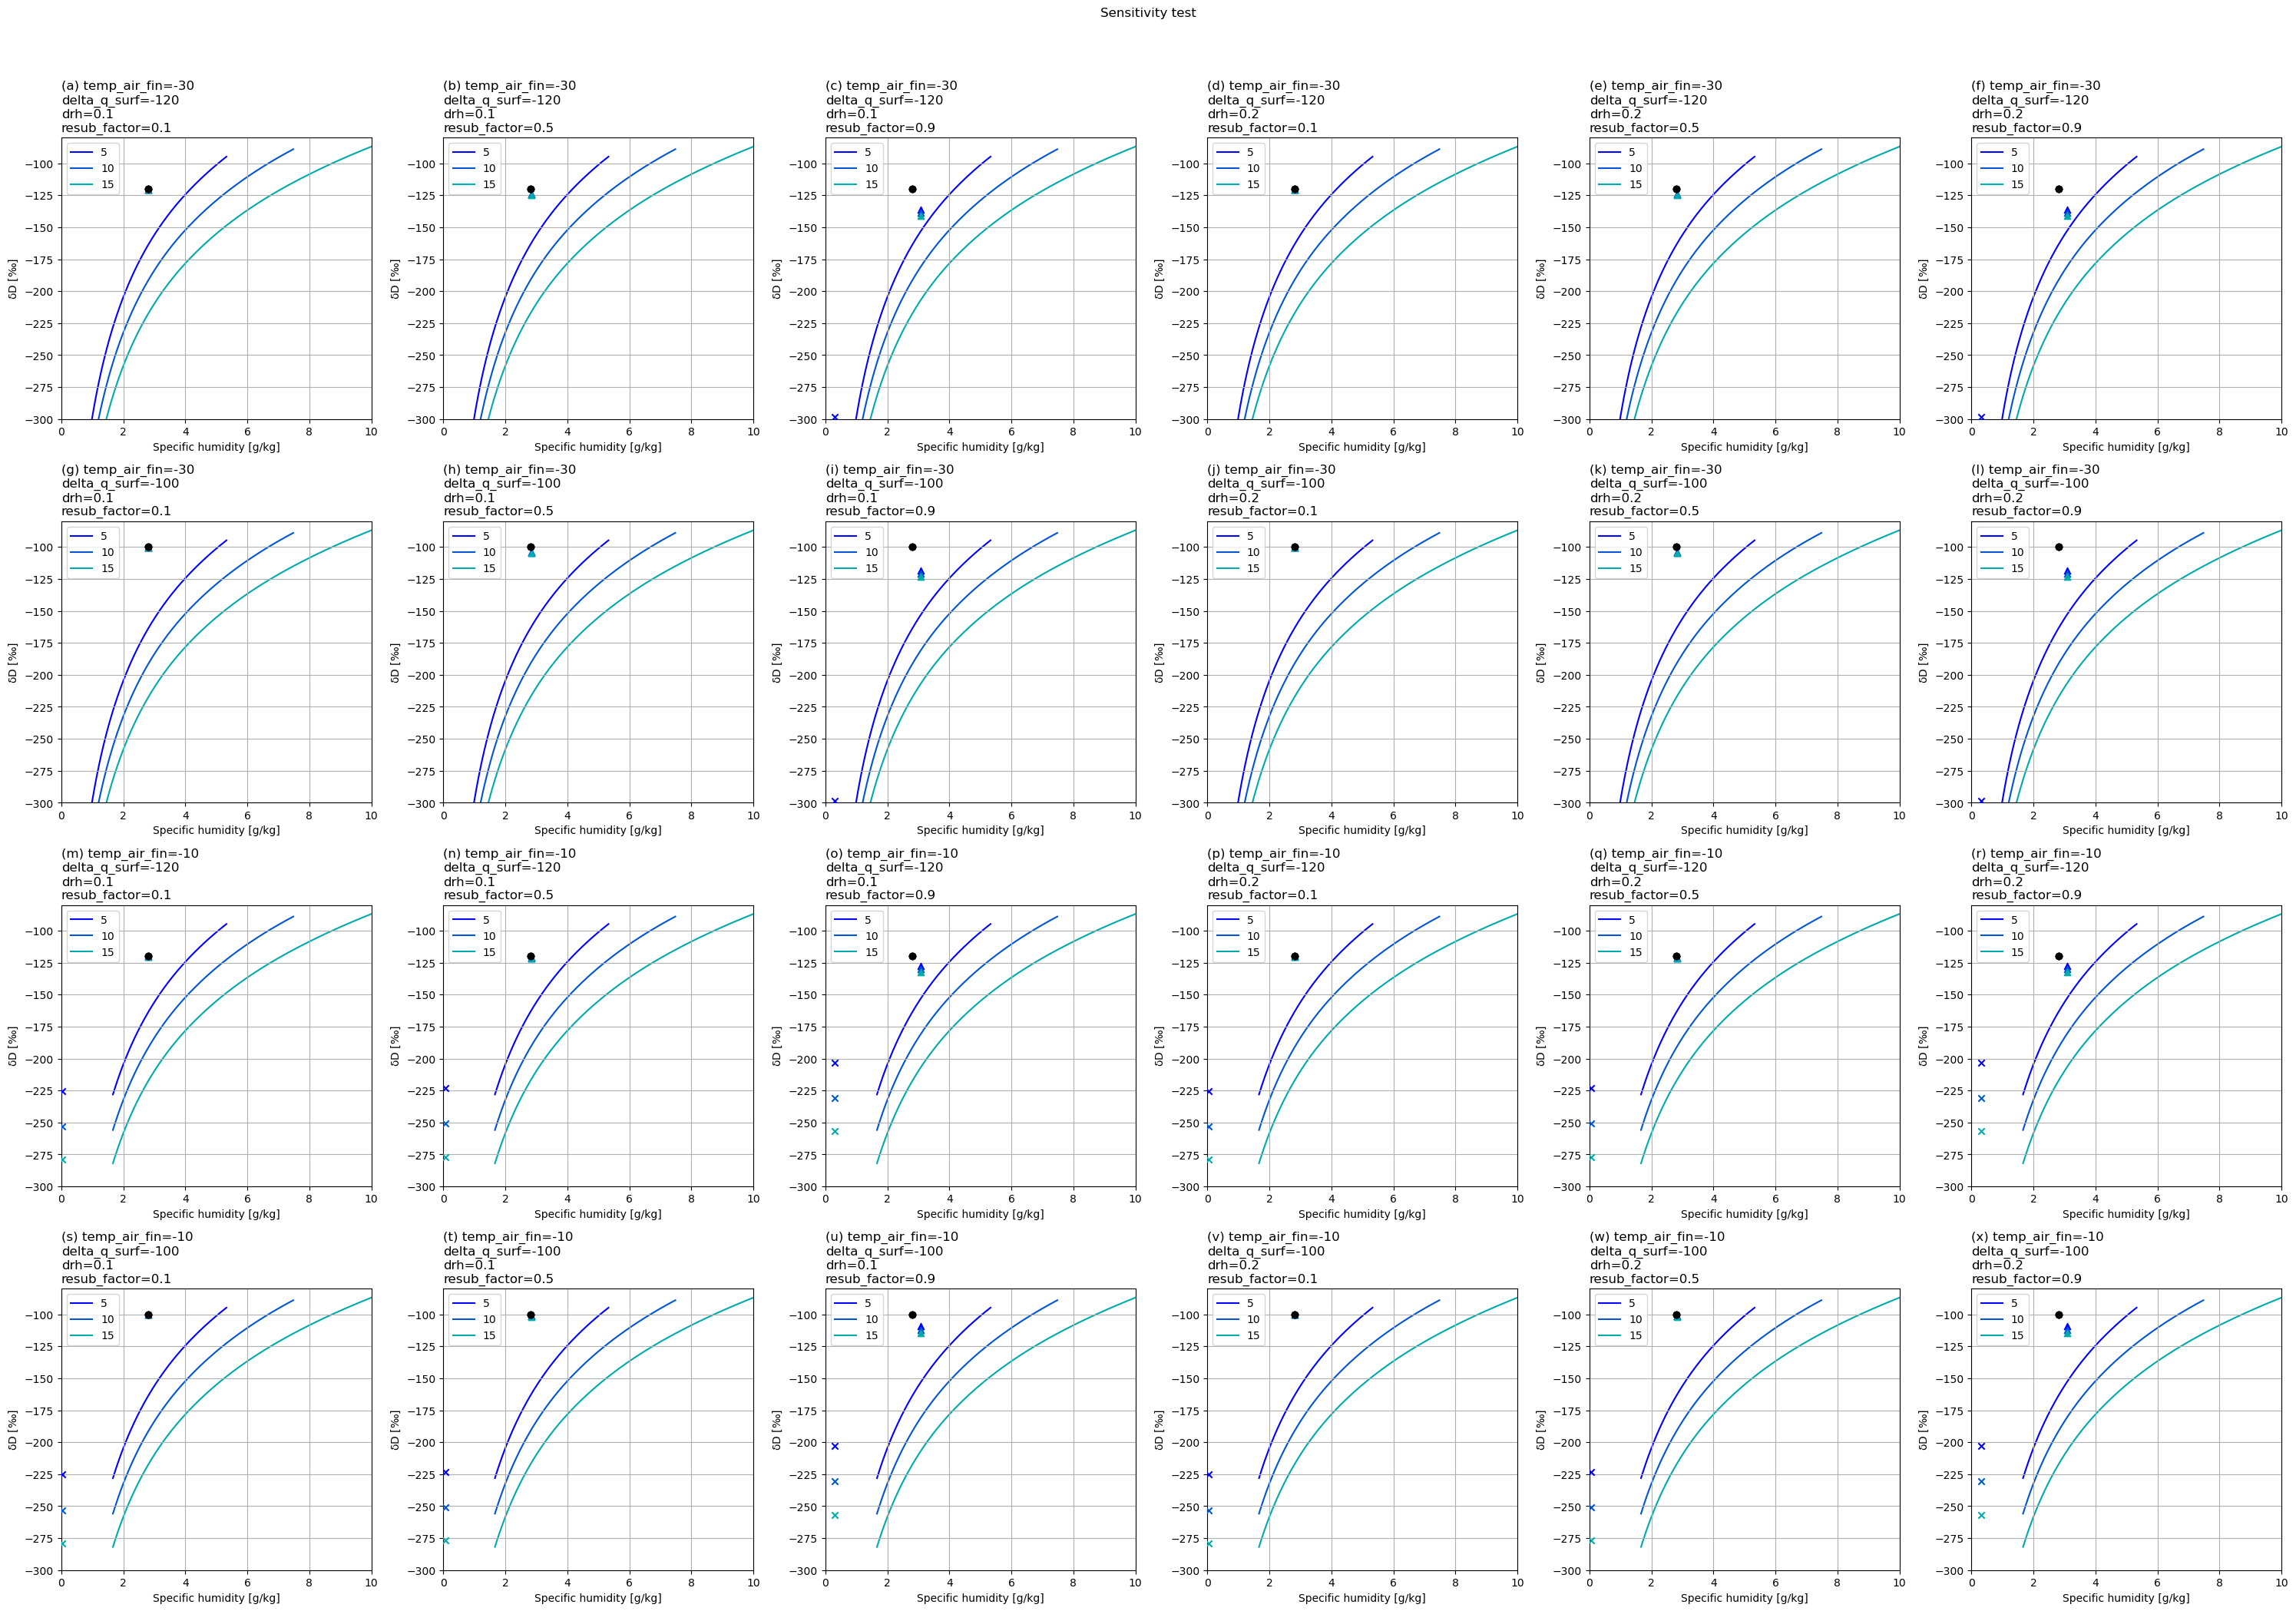

File saved as '/data37/kanon/modern_model_comparison/scripts/IsoFracPy/analysis/figures/Sensitivity_test.png'.


In [5]:
param_test_dict = {
    "temp_air_fin": [-30, -10],
    "delta_q_surf":[-120,-100],
    "drh":[0.1, 0.2],
    "resub_factor": [0.1,0.5,0.9]
}

fig_title="Sensitivity test"
run_sensitivity_analysis(
    param_test_dict=param_test_dict,
    param_fix_dict=param_fix_dict,
    fig_title=fig_title,
    iso_model_dir=iso_model_dir,
    subplot_hnum_max=6,
    xlim = (0, 10),
    ylim = (-300, -80),
    notebook_name=notebook_name
)

どの高さ(`temp_air_fin`)からふってものがどれくらい水蒸気に帰るか(`drh * f`)がいちばんききそう。
- モデルでは、`temp_air_fin`が低すぎる（あるいは上空で生成される同位体比が低すぎる）
- モデルでは、降水量`rh`が多すぎる
- モデルでは、昇華効率`f`が大きすぎる